In [15]:
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---- Classification Task ----


/home/mr-arthor/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:22:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


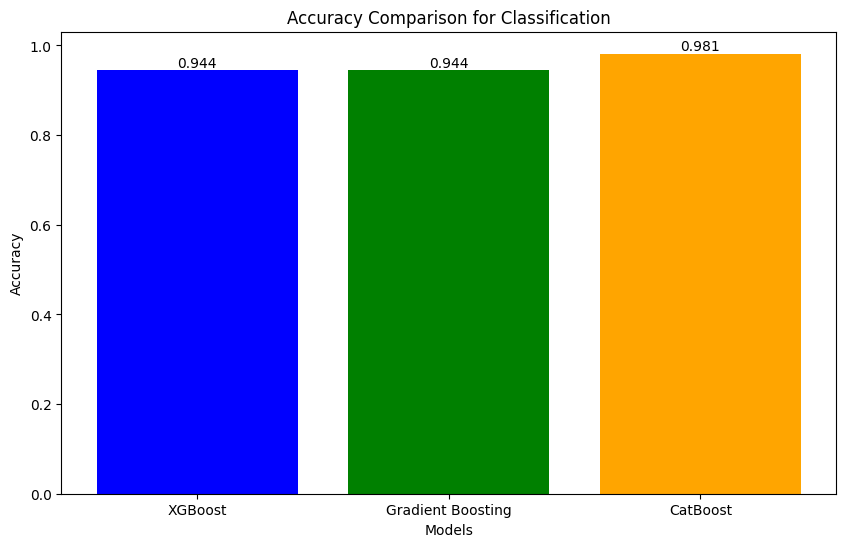


---- Regression Task ----


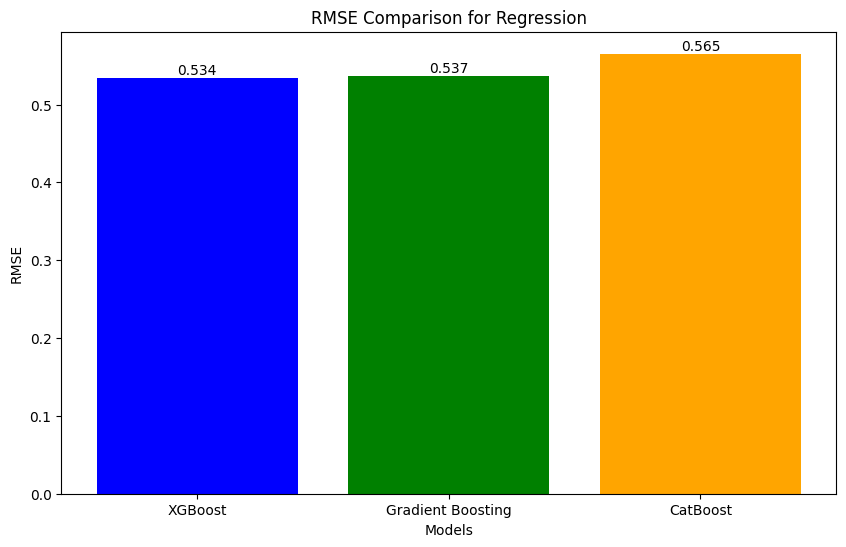


---- Summary ----
Classification Accuracy:
XGBoost: 0.94, Gradient Boosting: 0.94, CatBoost: 0.98

Regression RMSE:
XGBoost: 0.53, Gradient Boosting: 0.54, CatBoost: 0.57
Regression R2:
XGBoost: 0.78, Gradient Boosting: 0.78, CatBoost: 0.76


In [16]:
# Function to plot comparison
def plot_comparison(models, metrics, task, metric_name):
    plt.figure(figsize=(10, 6))
    plt.bar(models, metrics, color=["blue", "green", "orange"])
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison for {task}")
    for i, val in enumerate(metrics):
        plt.text(i, val, f"{val:.3f}", ha='center', va='bottom')
    plt.show()

# ---- Classification ----
print("---- Classification Task ----")

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Classifier
xgb_clf = XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=100, use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# CatBoost Classifier
cb_clf = CatBoostClassifier(iterations=100, learning_rate=0.2, depth=3, loss_function='MultiClass', random_seed=42, verbose=0)
cb_clf.fit(X_train, y_train)
cb_pred = cb_clf.predict(X_test)
cb_accuracy = accuracy_score(y_test, cb_pred)

# Classification Comparison Plot
plot_comparison(["XGBoost", "Gradient Boosting", "CatBoost"], [xgb_accuracy, gb_accuracy, cb_accuracy], "Classification", "Accuracy")

# ---- Regression ----
print("\n---- Regression Task ----")

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Regressor
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

# CatBoost Regressor
cb_reg = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, loss_function='RMSE', random_seed=42, verbose=0)
cb_reg.fit(X_train, y_train)
cb_pred = cb_reg.predict(X_test)
cb_rmse = np.sqrt(mean_squared_error(y_test, cb_pred))
cb_r2 = r2_score(y_test, cb_pred)

# Regression Comparison Plot
plot_comparison(["XGBoost", "Gradient Boosting", "CatBoost"], [xgb_rmse, gb_rmse, cb_rmse], "Regression", "RMSE")

# ---- Summary ----
print("\n---- Summary ----")

# Classification Results
print("Classification Accuracy:")
print(f"XGBoost: {xgb_accuracy:.2f}, Gradient Boosting: {gb_accuracy:.2f}, CatBoost: {cb_accuracy:.2f}")

# Regression Results
print("\nRegression RMSE:")
print(f"XGBoost: {xgb_rmse:.2f}, Gradient Boosting: {gb_rmse:.2f}, CatBoost: {cb_rmse:.2f}")
print("Regression R2:")
print(f"XGBoost: {xgb_r2:.2f}, Gradient Boosting: {gb_r2:.2f}, CatBoost: {cb_r2:.2f}")


In [27]:
df_Forest = pd.read_csv('/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets/covertype.csv')


In [ ]:
df_Forest.columns
df_Forest['Cover_Type'].value_counts()
df_Forest.to_csv('/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets/covertype.csv', index=False)


In [20]:
subset = df_Forest.groupby(df_Forest['Cover_Type'],).apply(lambda x: x.sample(n=25000, random_state=42, replace=True)).reset_index(drop=True)


/tmp/ipykernel_13777/1233197583.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset = df_Forest.groupby(df_Forest['Cover_Type'],).apply(lambda x: x.sample(n=25000, random_state=42, replace=True)).reset_index(drop=True)


In [21]:
subset['Cover_Type'].value_counts()


Cover_Type
1    25000
2    25000
3    25000
4    25000
5    25000
6    25000
7    25000
Name: count, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(subset.drop('Cover_Type', axis=1), subset['Cover_Type'], test_size=0.3, random_state=42)


In [24]:
cb_clf.fit(X_train, y_train)
cb_pred = cb_clf.predict(X_test)
cb_accuracy = accuracy_score(y_test, cb_pred)


CatBoost Accuracy: 0.77


NameError: name 'classification_report' is not defined

In [25]:
from sklearn.metrics import classification_report
print(f"CatBoost Accuracy: {cb_accuracy:.2f}")
print(classification_report(y_test, cb_pred))


CatBoost Accuracy: 0.77
              precision    recall  f1-score   support

           1       0.68      0.66      0.67      7342
           2       0.70      0.52      0.59      7591
           3       0.72      0.70      0.71      7559
           4       0.87      0.95      0.91      7434
           5       0.76      0.87      0.81      7486
           6       0.73      0.74      0.73      7613
           7       0.87      0.94      0.90      7475

    accuracy                           0.77     52500
   macro avg       0.76      0.77      0.76     52500
weighted avg       0.76      0.77      0.76     52500

